<a href="https://colab.research.google.com/github/udupa-varun/pyimagesearch_uni/blob/main/deep_learning/104/convolutions_cross_correlations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget https://pyimagesearch-code-downloads.s3-us-west-2.amazonaws.com/convolutions-cross-correlation/convolutions-cross-correlation.zip
!unzip -qq convolutions-cross-correlation.zip
%cd convolutions-cross-correlation

--2023-02-21 09:59:58--  https://pyimagesearch-code-downloads.s3-us-west-2.amazonaws.com/convolutions-cross-correlation/convolutions-cross-correlation.zip
Resolving pyimagesearch-code-downloads.s3-us-west-2.amazonaws.com (pyimagesearch-code-downloads.s3-us-west-2.amazonaws.com)... 52.218.245.201, 52.218.182.145, 3.5.81.161, ...
Connecting to pyimagesearch-code-downloads.s3-us-west-2.amazonaws.com (pyimagesearch-code-downloads.s3-us-west-2.amazonaws.com)|52.218.245.201|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 433968 (424K) [binary/octet-stream]
Saving to: ‘convolutions-cross-correlation.zip’

convolutions-cross- 100%[===================>] 423.80K  1.65MB/s    in 0.3s    

2023-02-21 09:59:58 (1.65 MB/s) - ‘convolutions-cross-correlation.zip’ saved [433968/433968]

/content/convolutions-cross-correlation


In [2]:
from skimage.exposure import rescale_intensity
import matplotlib.pyplot as plt
import numpy as np
import cv2

In [3]:
def plt_imshow(title, image):
    # convert from BGR to RGB
    if len(image.shape) == 3:
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RBG)
    plt.imshow(image)
    plt.title(title)
    plt.grid(False)
    plt.show()


In [18]:
def convolve(image, K):
    # grab spatial dims for image and kernel
    (ih, iw) = image.shape[:2]
    (kh, kw) = K.shape[:2]

    # allocate space for output image
    # pad borders for input image so the size is not reduced
    pad = (kw - 1) // 2
    image = cv2.copyMakeBorder(image, pad, pad, pad, pad, cv2.BORDER_REPLICATE)
    output = np.zeros((ih, iw), dtype="float")

    # loop over input image, sliding the kernel across each xy coord
    # left to right and top to bottom
    for y in np.arange(pad, ih + pad):
        for x in np.arange(pad, iw + pad):
            # extract the ROI
            roi = image[y - pad:y + pad + 1, x - pad:x + pad + 1]

            # perform convolution by taking element wise multiplication
            # between ROI and kernel, then taking the sum
            k = (roi * K).sum()

            # store the convolved value in the output xy coord
            output[y - pad, x - pad] = k
    
    # rescale output image to be in the range [0, 255]
    output = rescale_intensity(output, in_range=(0, 255))
    output = (output * 255).astype("uint8")

    # return output image
    return output



In [5]:
# construct average blurring kernels used to smooth an image
small_blur = np.ones((7, 7), dtype="float") * (1.0 / (7 * 7))
large_blur = np.ones((21, 21), dtype="float") * (1.0 / (21 * 21))

In [6]:
# construct a sharpening filter
sharpen = np.array((
    [0, -1, 0],
    [-1, 5, -1],
    [0, -1, 0]),
    dtype="int"
)

In [7]:
# construct a Laplacian kernel to detect edge-like regions
laplacian = np.array((
    [0, 1, 0],
    [1, -4, 1],
    [0, 1, 0]),
    dtype="int"
)

In [10]:
# Sobel X kernel
sobel_x = np.array((
    [-1, 0, 1],
    [-2, 0, 2],
    [-1, 0, 1]),
    dtype="int"
)

In [11]:
# Sobel Y kernel
sobel_y = np.array((
    [-1, -2, -1],
    [0, 0, 0],
    [1, 2, 1]),
    dtype="int"
)

In [12]:
# emboss kernel
emboss = np.array((
    [-2, -1, 0],
    [-1, 1, 1],
    [0, 1, 2]),
    dtype="int"
)

In [13]:
# construct kernel bank
kernel_bank = (
    ("small_blur", small_blur),
    ("large_blur", large_blur),
    ("sharpen", sharpen),
    ("laplacian", laplacian),
    ("sobel_x", sobel_x),
    ("sobel_y", sobel_y),
    ("emboss", emboss)
)

In [14]:
# load input image and convert to grayscale
image = cv2.imread("jemma.png")
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

[INFO] applying small_blur kernel


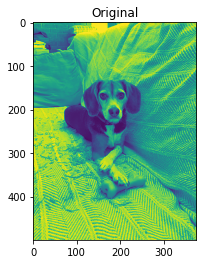

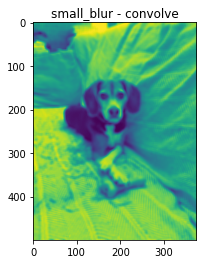

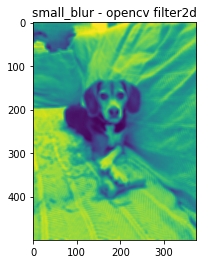

[INFO] applying large_blur kernel


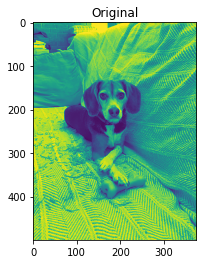

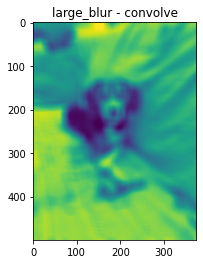

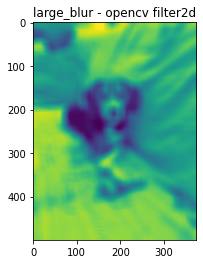

[INFO] applying sharpen kernel


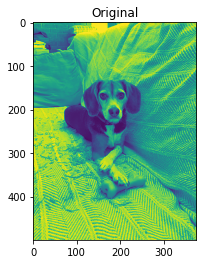

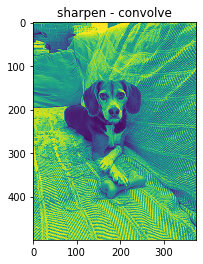

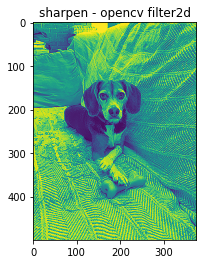

[INFO] applying laplacian kernel


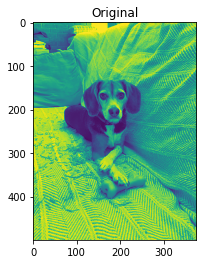

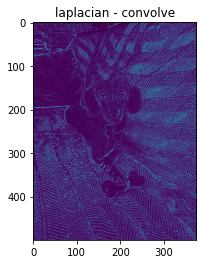

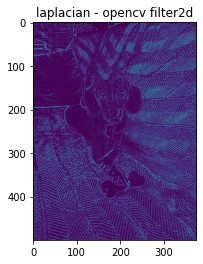

[INFO] applying sobel_x kernel


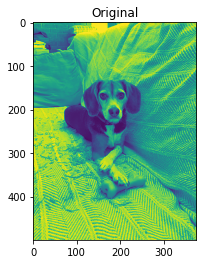

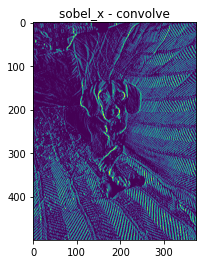

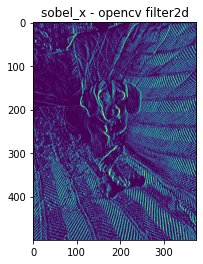

[INFO] applying sobel_y kernel


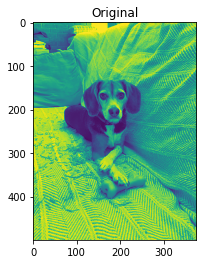

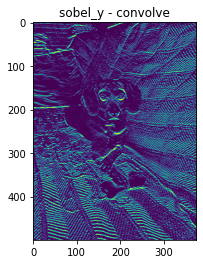

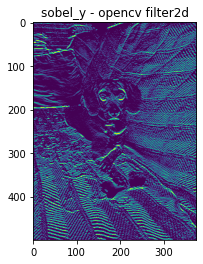

[INFO] applying emboss kernel


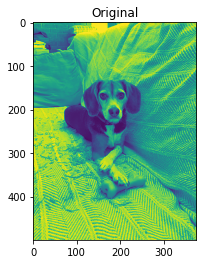

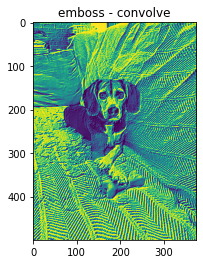

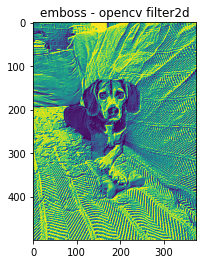

In [19]:
# loop over the kernels
for (kernel_name, K) in kernel_bank:
    # apply kernel to grayscale image
    print(f"[INFO] applying {kernel_name} kernel")
    # using custom convolve function
    convolve_output = convolve(gray, K)
    # using OpenCV function
    opencv_output = cv2.filter2D(gray, -1, K)

    # show output images
    plt_imshow("Original", gray)
    plt_imshow(f"{kernel_name} - convolve", convolve_output)
    plt_imshow(f"{kernel_name} - opencv filter2d", opencv_output)